In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Preprocessing**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Applying one hot encoding**

In [ ]:
df=pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [ ]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


##**feature selection**

In [ ]:
features=df[['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

##**data scalling**

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

##**Optiml Custores use elbow technique**

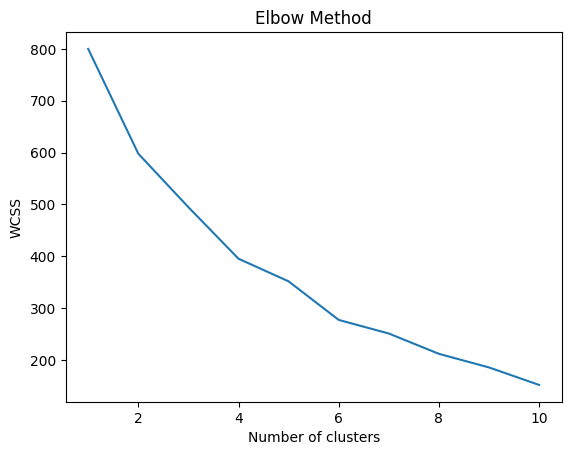

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##**applying kmeans**

In [ ]:
k=5
kmeans=KMeans(n_clusters=k, random_state=42)
clusters=kmeans.fit_predict(scaled_features)

df['Cluster']=clusters

##**Visualization**

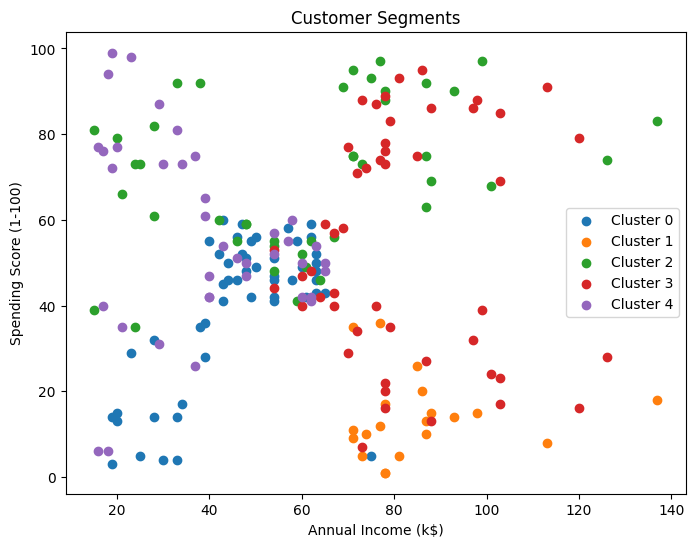

In [ ]:
plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(df[df['Cluster']==cluster]['Annual Income (k$)'],
                df[df['Cluster']==cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##**Clusters interpret**

In [ ]:
print(df.groupby('Cluster').mean())

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         65.333333  56.470588           46.098039               39.313725   
1        159.500000  39.500000           85.150000               14.050000   
2        100.809524  28.690476           60.904762               70.238095   
3        151.510204  37.897959           82.122449               54.448980   
4         50.526316  27.315789           38.842105               56.210526   

         Genre_Male  
Cluster              
0          0.509804  
1          1.000000  
2          1.000000  
3          0.000000  
4          0.000000  
